In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from bs4 import BeautifulSoup as bts
import urllib.request
import re
from keras.preprocessing.text import Tokenizer # equivalente a ltokenizer de nltk
from keras.preprocessing.text import text_to_word_sequence # equivalente a word_teokenize de nltk
from keras.preprocessing.sequence import pad_sequences # se utilizará para padding
from keras.layers import Dense, LSTM, Embedding, Dropout

In [ ]:
#Para entrenar este modelo, vamos a tomar 100 artículos aleatorios de Wikipedia (se demora unos 40 segundos)
textos=''
for xtelle in range(100):
  rhederittie_url=urllib.request.urlopen('https://en.wikipedia.org/wiki/Special:Random')
  raw_html=rhederittie_url.read()
  article_html=bts(raw_html,'lxml')
  article_paragraphs=article_html.find_all('p')

  for parrafo in article_paragraphs:
    textos+=parrafo.text

In [ ]:
textos

'Sharon Quirk-Silva (born September 17, 1962) is an American politician and educator serving as a member of the California State Assembly, representing the 65th Assembly District, which includes portions of northern Orange County.\nQuirk-Silva was born in Los Angeles and raised in Fullerton, California. Quirk-Silva earned an Associates of Arts degree from Fullerton College, a Bachelor of Arts in sociology from University of California, Los Angeles and a teaching credential from California State University, Fullerton.[3]\nShe was married to Shawn Quirk from 1985 to 2006.[2] Her current husband, Jesus Silva, is an educator who was elected Mayor of Fullerton in 2018.[4] Quirk-Silva has four children.\nPrior to her service in the Assembly, she was the Mayor of Fullerton and an elementary school teacher.\nShe was first elected to the Assembly in an upset, unseating Republican Assemblyman Chris Norby by a narrow margin in 2012. Quirk-Silva sought a second term in 2014, but was defeated by Re

Pasamos a hacer el preprocesamiento de los datos

In [ ]:
article_text = textos.lower()
text = re.sub(r'\[[0-9]*\]', ' ', article_text)
text = re.sub(r'\s+', ' ', text)

In [ ]:
text

'sharon quirk-silva (born september 17, 1962) is an american politician and educator serving as a member of the california state assembly, representing the 65th assembly district, which includes portions of northern orange county. quirk-silva was born in los angeles and raised in fullerton, california. quirk-silva earned an associates of arts degree from fullerton college, a bachelor of arts in sociology from university of california, los angeles and a teaching credential from california state university, fullerton. she was married to shawn quirk from 1985 to 2006. her current husband, jesus silva, is an educator who was elected mayor of fullerton in 2018. quirk-silva has four children. prior to her service in the assembly, she was the mayor of fullerton and an elementary school teacher. she was first elected to the assembly in an upset, unseating republican assemblyman chris norby by a narrow margin in 2012. quirk-silva sought a second term in 2014, but was defeated by republican youn

In [ ]:
tokens=text_to_word_sequence(text)

In [ ]:
len(tokens)

38972

In [ ]:
#Hacemos el desfazaje de las palabras según el traun len
train_len=5

text_sequences=[]

for i in range(train_len,len(tokens)):
  seq=tokens[i-train_len:i]
  text_sequences.append(seq)

In [ ]:
len(text_sequences)

38967

In [ ]:
tok = Tokenizer() 
tok.fit_on_texts(text_sequences) 
sequences = tok.texts_to_sequences(text_sequences)

In [ ]:
sequences

[[7856, 1007, 1006, 78, 231],
 [1007, 1006, 78, 231, 243],
 [1006, 78, 231, 243, 1534],
 [78, 231, 243, 1534, 9],
 [231, 243, 1534, 9, 21],
 [243, 1534, 9, 21, 101],
 [1534, 9, 21, 101, 726],
 [9, 21, 101, 726, 4],
 [21, 101, 726, 4, 1535],
 [101, 726, 4, 1535, 1008],
 [726, 4, 1535, 1008, 13],
 [4, 1535, 1008, 13, 5],
 [1535, 1008, 13, 5, 338],
 [1008, 13, 5, 338, 3],
 [13, 5, 338, 3, 1],
 [5, 338, 3, 1, 244],
 [338, 3, 1, 244, 57],
 [3, 1, 244, 57, 727],
 [1, 244, 57, 727, 1536],
 [244, 57, 727, 1536, 1],
 [57, 727, 1536, 1, 3413],
 [727, 1536, 1, 3413, 727],
 [1536, 1, 3413, 727, 281],
 [1, 3413, 727, 281, 35],
 [3413, 727, 281, 35, 1009],
 [727, 281, 35, 1009, 3414],
 [281, 35, 1009, 3414, 3],
 [35, 1009, 3414, 3, 1010],
 [1009, 3414, 3, 1010, 563],
 [3414, 3, 1010, 563, 95],
 [3, 1010, 563, 95, 1007],
 [1010, 563, 95, 1007, 1006],
 [563, 95, 1007, 1006, 7],
 [95, 1007, 1006, 7, 78],
 [1007, 1006, 7, 78, 2],
 [1006, 7, 78, 2, 378],
 [7, 78, 2, 378, 837],
 [78, 2, 378, 837, 4],
 [2,

In [ ]:
print(tok.document_count)

38967


In [ ]:
print(len(tok.word_counts))

7856


In [ ]:
print(tok.word_index)

{'the': 1, 'in': 2, 'of': 3, 'and': 4, 'a': 5, 'to': 6, 'was': 7, 'for': 8, 'is': 9, 'he': 10, 'on': 11, 'with': 12, 'as': 13, 'by': 14, 'his': 15, 'at': 16, 'harbaugh': 17, 'from': 18, 'it': 19, 'that': 20, 'an': 21, 'first': 22, 'yards': 23, 'season': 24, 'also': 25, 'after': 26, 'game': 27, 'lando': 28, 'had': 29, 'were': 30, '1': 31, 'year': 32, 'has': 33, 'michigan': 34, 'which': 35, 'this': 36, 'over': 37, 'new': 38, 'coach': 39, 'two': 40, 'school': 41, 'album': 42, '–': 43, 'its': 44, 'but': 45, 'best': 46, 'who': 47, 'mw': 48, 'parser': 49, 'output': 50, 'passes': 51, 'one': 52, '5': 53, 'she': 54, '3': 55, '2': 56, 'state': 57, 'team': 58, 'help': 59, 'their': 60, '12': 61, 'university': 62, 'second': 63, 'can': 64, 'are': 65, 'during': 66, '10': 67, 'not': 68, '13': 69, '7': 70, 'three': 71, 'football': 72, 'completed': 73, 'games': 74, 'you': 75, 'be': 76, 'time': 77, 'born': 78, 'they': 79, '14': 80, 'all': 81, 'played': 82, 'against': 83, '4': 84, 'her': 85, 'record': 86,

Pasamos a separar los vectores para crear nuestros datasets de train y test

In [ ]:
sequences

[[7856, 1007, 1006, 78, 231],
 [1007, 1006, 78, 231, 243],
 [1006, 78, 231, 243, 1534],
 [78, 231, 243, 1534, 9],
 [231, 243, 1534, 9, 21],
 [243, 1534, 9, 21, 101],
 [1534, 9, 21, 101, 726],
 [9, 21, 101, 726, 4],
 [21, 101, 726, 4, 1535],
 [101, 726, 4, 1535, 1008],
 [726, 4, 1535, 1008, 13],
 [4, 1535, 1008, 13, 5],
 [1535, 1008, 13, 5, 338],
 [1008, 13, 5, 338, 3],
 [13, 5, 338, 3, 1],
 [5, 338, 3, 1, 244],
 [338, 3, 1, 244, 57],
 [3, 1, 244, 57, 727],
 [1, 244, 57, 727, 1536],
 [244, 57, 727, 1536, 1],
 [57, 727, 1536, 1, 3413],
 [727, 1536, 1, 3413, 727],
 [1536, 1, 3413, 727, 281],
 [1, 3413, 727, 281, 35],
 [3413, 727, 281, 35, 1009],
 [727, 281, 35, 1009, 3414],
 [281, 35, 1009, 3414, 3],
 [35, 1009, 3414, 3, 1010],
 [1009, 3414, 3, 1010, 563],
 [3414, 3, 1010, 563, 95],
 [3, 1010, 563, 95, 1007],
 [1010, 563, 95, 1007, 1006],
 [563, 95, 1007, 1006, 7],
 [95, 1007, 1006, 7, 78],
 [1007, 1006, 7, 78, 2],
 [1006, 7, 78, 2, 378],
 [7, 78, 2, 378, 837],
 [78, 2, 378, 837, 4],
 [2,

In [ ]:
tam_vocab=len(tok.word_counts)
seqnp=np.array(sequences)
input=seqnp[:,:-1]
input_seq_length=input.shape[1]
target_pre_OHE=seqnp[:,-1]
target_offset=target_pre_OHE-1
target=to_categorical(target_offset,num_classes=tam_vocab)

Y ya estaríamos listos para entrenar el modelo.

In [ ]:
modelo=Sequential()

modelo.add(Embedding(input_dim=tam_vocab+1,output_dim=6, input_length=input_seq_length))
modelo.add(LSTM(64, return_sequences=True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(64))
modelo.add(Dense(32, activation='relu'))

modelo.add(Dense(tam_vocab, activation='softmax'))

modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 6)              47142     
                                                                 
 lstm (LSTM)                 (None, 4, 64)             18176     
                                                                 
 dropout (Dropout)           (None, 4, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 7856)              259248    
                                                                 
Total params: 359,670
Trainable params: 359,670
Non-trai

In [ ]:
hist = modelo.fit(input, target, epochs=15, validation_split=0.2)

Epoch 1/15
975/975 [==============================] - 20s 20ms/step - loss: 3.2484 - accuracy: 0.2927 - val_loss: 24.4388 - val_accuracy: 0.0472
Epoch 2/15
975/975 [==============================] - 18s 19ms/step - loss: 3.2271 - accuracy: 0.2968 - val_loss: 24.5486 - val_accuracy: 0.0431
Epoch 3/15
975/975 [==============================] - 18s 19ms/step - loss: 3.2080 - accuracy: 0.2965 - val_loss: 24.4840 - val_accuracy: 0.0468
Epoch 4/15
975/975 [==============================] - 18s 19ms/step - loss: 3.1761 - accuracy: 0.3035 - val_loss: 25.1502 - val_accuracy: 0.0475
Epoch 5/15
975/975 [==============================] - 18s 19ms/step - loss: 3.1608 - accuracy: 0.3044 - val_loss: 24.9105 - val_accuracy: 0.0468
Epoch 6/15
975/975 [==============================] - 20s 20ms/step - loss: 3.1383 - accuracy: 0.3114 - val_loss: 25.0508 - val_accuracy: 0.0462
Epoch 7/15
975/975 [==============================] - 18s 19ms/step - loss: 3.1146 - accuracy: 0.3135 - val_loss: 25.2043 - val_ac

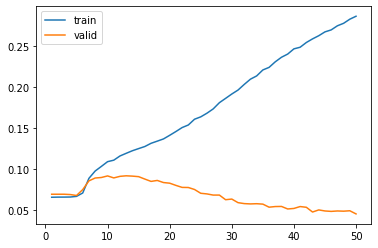

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_accuracy'], label='valid')
plt.show()

Una vez entrenado, pasamos a hacer la predicción de texto

In [ ]:
import sys
!{sys.executable} -m pip install gradio --quiet

Como está entrenado a partir de artículos aleatorios de Wikipedia, es recomendable usar una de las palabras que están acá:

In [ ]:
text

In [ ]:
import gradio as gr

def model_response(human_text):

    encoded = tok.texts_to_sequences([human_text])[0]
    encoded = pad_sequences([encoded], maxlen=4, padding='pre')
    
    y_hat = modelo.predict(encoded).argmax(axis=-1)

    out_word = ''
    for word, index in tok.word_index.items():
        if index == y_hat:
            out_word = word
            break
            
    return human_text + ' ' + out_word

iface = gr.Interface(
    fn=model_response,
    inputs=["textbox"],
    outputs="text",
    layout="vertical")

iface.launch(debug=True)